$$
f(x)=\exp{\sqrt{x}}+k\exp(-kx)\\
k=2+0.1 \cdot N\\
N=107 \text{ (вариант})
$$

$$
f'(x_\min) = \frac{1}{2\sqrt{x_\min}}\exp\sqrt{x_\min} - k^2 \exp(-kx_\min) = 0\\
x_\min \approx 0.367695\\
f(x_\min) \approx 1.95284
$$

In [1]:
from math import exp, sqrt
import numpy as np
n = 107
k = 2 + 0.1 * n
def f(x):
    return exp(sqrt(x)) + k * exp(-k * x)

a = 0
b = 5

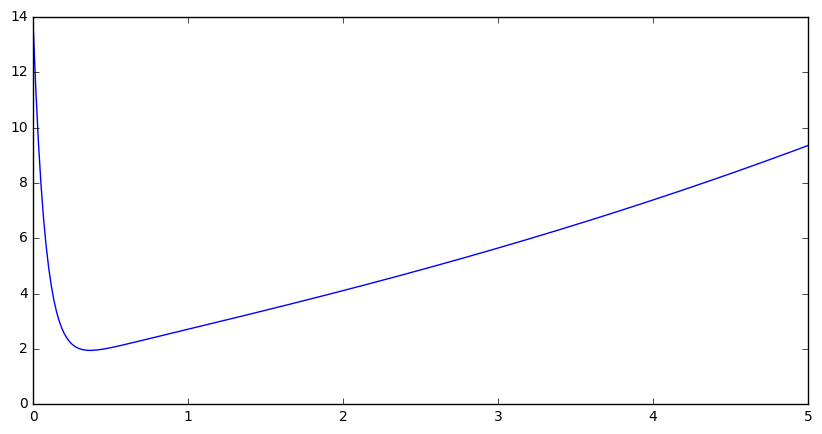

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(a, b, 300)
plt.figure(figsize=(10, 5))
plt.plot(X, np.vectorize(f)(X))
plt.show()

In [3]:
class Ans:
    def __init__(self):
        self.used = False
        self.count = 0
        self.minArg = 0
        self.minVal = 0
        
    def update(self, arg):
        self.count += 1
        val = f(arg)
        if not self.used:
            self.used = True
            self.minArg = arg
            self.minVal = val
        elif val < self.minVal:
            self.minArg = arg
            self.minVal = val
        return val
        
    def __repr__(self):
        if self.used:
            return str("x_min = {}, f(x_min) = {}, count = {}".format(self.minArg, self.minVal, self.count))
        else:
            return "undefined"

## Сканирование

In [4]:
def scan(a, b, step_n):
    ans = Ans()
    ans.update(b)
    for step in range(step_n):
        ans.update(a + step * (b - a) / step_n)
    return ans

In [5]:
scan(0, 5, 100)

x_min = 0.35, f(x_min) = 1.9559527696757808, count = 101

## Дихотомия

In [6]:
def binSearch(a, b, delta, eps):
    ans = Ans()
    while (b - a) / 2 > eps:
        c = (a + b) / 2 - delta / 2
        d = (a + b) / 2 + delta / 2
        if ans.update(c) <= ans.update(d):
            b = d
        else:
            a = c
    ans.update((a + b) / 2)
    return ans

In [7]:
binSearch(0, 5, 10e-7 / 2, 10e-7)

x_min = 0.3676947103390098, f(x_min) = 1.9528388858306518, count = 45

## Золотое сечение

In [8]:
def golden(a, b, eps):
    ans = Ans()
    c = None
    d = None
    f_c = None
    f_d = None
    while (b - a) / 2 > eps:
        if c is None:
            c = (3 - sqrt(5)) / 2 * (b - a) + a
            f_c = ans.update(c)
        if d is None:
            d = (sqrt(5) - 1) / 2 * (b - a) + a
            f_d = ans.update(d)
        if f_c <= f_d:
            b = d
            d, f_d = c, f_c
            c = None
        else:
            a = c
            c, f_c = d, f_d
            d = None
    ans.update((a + b) / 2)
    return ans

In [9]:
golden(0, 5, 10e-7)

x_min = 0.3676946377681959, f(x_min) = 1.9528388858305743, count = 33

## Фибоначчи

In [10]:
def fib(a, b, eps):
    n = 0
    fibs = {1: 1, 2: 1}
    while fibs[n + 2] < (b - a) / eps:
        n += 1
        fibs[n + 2] = fibs[n] + fibs[n + 1]
    print(n)
    
    ans = Ans()
    c = None
    d = None
    f_c = None
    f_d = None
    for i in range(1, n + 1):
        if c is None:
            c = a + (b - a) * fibs[n + 1 - i] / fibs[n + 3 - i]
            f_c = ans.update(c)
        if d is None:
            d = a + (b - a) * fibs[n + 2 - i] / fibs[n + 3 - i]
            f_d = ans.update(d)
        if f_c <= f_d:
            b = d
            d, f_d = c, f_c
            c = None
        else:
            a = c
            c, f_c = d, f_d
            d = None
    ans.update((a + b) / 2)
    return ans

In [11]:
fib(0, 5, 10e-7)

32


x_min = 0.3676944677318698, f(x_min) = 1.9528388858307721, count = 34